<center><img src="images/header.png"></center>

<h1><center>Лекция №6: Введение в анализ социальных сетей</center></h1>
<hr>
<h1><center>Домашняя работа</center></h1>

Данное ДЗ является довольно творческим и оно требует довольно много самостоятельной работы, так что не стоит с ним мешкать =)

Вам предлагается выбрать сообщество (или сообщества) в сети ВКонтакте и проанализировать его (их) контингент. 


**Правила:**
* Отчеты принимаются до **23:59 19 ноября**. Вы должны залить ваш ноутбук в github дать на него ссылку в следующей [форме](https://forms.gle/88d9CfaJN5gPV4bB8).
* Работоспособность будет проверяться через [colab](https://colab.research.google.com) (можете сразу давать ссылку на него). Если ноутбук не будет исполняться (падать по ошибке) то все, что будет написано после ошибки не будет учитываться при формировании оценки. Для самопроверки, выполните аналог restart kernel and run all cells в colab
* Вы должны включить код, с помощью которого вы общались с API вконтакте, но для экономии времени, заранее предусмотреть возможность загрузки уже собранных данных (например, как это было реализовано в ноутбуках по кластеризации через `wget` и dropbox или raw данными в github)

**Пожелания:**
* Выбирайте для анализа небольшие сообщества (до 5к), желательно чтобы вы сами в них состояли - это ускорит вычисления и упростит интерпретацию
* Отнеситесь к этой работе как к исследованию - больше графиков и комментариев!
* Красивые визуализации лучше делать через gephi!

# Загрузка данных (2 балла)

Изучите следующие материалы
* [Знакомство с API](https://vk.com/dev/first_guide)
* [Туториал](https://nbviewer.jupyter.org/github/allatambov/Py-programming-3/blob/master/15-06/lect-vk-api.ipynb) по выгрузке данных с помощью VKAPI
* Про метод execute - [туть](https://vk.com/dev/execute) и [туть](http://www.cyberforum.ru/python-web/thread1730446.html)

Выберите сообщество и загрузите
* Идентификаторы всех [участников сообщества](https://vk.com/dev/groups.getMembers)
* [Списки друзей](https://vk.com/dev/friends.get) участников и их признаки (пол, возраст, университет и все, что посчитаете нужным - нам потом группировать по этим атрибутам)
* [Пересечение](https://vk.com/dev/friends.getMutual) между списками друзей

Таким образом вы должны получить замкнутую группу аккаунтов с их друзьями и связями между ними.

Далее - соберите их этого граф в networkX и сохраните в graphml или gml формате

**Замечания:**
* Вконтакте может ограничить вам скорость запросов, поэтому иногда имеет смысл ставить небольшую паузу (`time.sleep(1)`) между запросами и сохранять предварительные результаты
* Код выгрузки может быть написан как с помощью модуля `vk` так и просто с помощью requests
* Некоторые пользователи могли сделать свой аккаунт приватным, что может вызвать ошибку в методе `getMutual`. Чтобы этого избежать придется проверять каждого на приватность с помощью `users.get` и аттрибута `is_closed`


In [22]:
### Здесь должен быть код загрузки из VK
### Его можно закомментировать

%matplotlib inline

#import vk
from time import sleep
import json
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx

from IPython.display import Image

In [ ]:
# token = 'facd97280799da423ef0977ea7ead2b926aa892ff41ff31fb2a1757af71593705d4d49412e6ee0c2837b2'

# session = vk.Session(access_token = token) 
#  api = vk.API(session)

# group = 'keykeykita'

### Загрузка информации об участниках сообщества 

In [ ]:
# res = api.groups.getMembers(group_id = group, fields = 'sex,bdate,city,education,universities', v = 5.89)

# num_members = res['count']
# members = res['items']

#for i in range(1, int(num_members/1000) + 1):
#     res = api.groups.getMembers(group_id = group, offset = 1000 * i, fields = 'sex,bdate,city,education,universities', v = 5.89)
#     temp_members = res['items']
#     members.extend(temp_members) 
#     sleep(1)
    
# f = open("all_members.json", 'w+')
# f.write(json.dumps(members))

### Загрузка списков друзей участников сообщества

In [ ]:
# members_friends = {}

# for i in tqdm(members):
#     check_member = api.users.get(user_ids = i['id'], v = 5.89)
#     if ('deactivated' in check_member[0].keys() or check_member[0]['is_closed']):
#         sleep(1)
#         continue
#     friends_temp = dict()
#     friends = api.friends.get(user_id = i['id'], fields = 'sex,bdate,city,education,universities', v = 5.89) 
#     for k in friends['items']:
#         friends_temp[int(k['id'])] = k
#     members_friends[int(i['id'])] = friends_temp
#     sleep(1)
    
# f = open("members_friends.json", 'w+')
# f.write(json.dumps(members_friends))

In [ ]:
# temp = members.copy()
# members = []

# for i in temp:
#     if (i['id'] in members_friends.keys()):
#         members.append(i)
        
# f = open("valid_members.json", 'w+')
# f.write(json.dumps(members))

### Загрузка пересечения между списками друзей 

In [ ]:
# def split_ids(s):
#     l = len(s) // 100
#     li = len(s)
#     sp = []
#     for i in range(l):
#         sp.append(s[i * 100: (i + 1) * 100])
#         li = li - 100
#     if li:
#         sp.append(s[l * 100:])
#     return sp

In [ ]:
# mutual_friends = {}

# members_ids_1 = list(members_friends.keys())

# for member1 in tqdm(members_ids_1):
    
#     members_ids_2 = list(members_friends.keys())
#     members_ids_2.remove(member1)
    
#     mutual_friends[member1] = []
    
#     for members2 in split_ids(members_ids_2):
#         s = ""
#         for i in members2:
#             s += str(i) + ','
#         s = s[:-1]
#         mfriends = api.friends.getMutual(source_uid=member1, target_uids=s, v = 5.89)
#         mutual_friends[member1].extend(mfriends)
#         sleep(1)
        
    
# f = open("mutual_friends.json", 'w+')
# f.write(json.dumps(mutual_friends))

### Создание графа 

In [14]:
## Здесь должен быть код преобразования в граф и сохранение в файл
## Его тоже можно закомментировать


# with open('valid_members.json', 'r') as fin:
#     members = json.load(fin)
    
# with open('members_friends.json', 'r') as fin:
#     friends = json.load(fin)
    
# with open('mutual_friends.json', 'r') as fin:
#     common_friends = json.load(fin)

In [15]:
#записываем город участникам и их друзьям 

# for i in members:
#     city = i.get('city')
#     if (city and type(city) == dict):
#         i['city'] = city['title']
        
# for key, val in friends.items():
#     for i, j in val.items():
#         city = j.get('city')
#         if (city and type(city) == dict):

#             j['city'] = city['title']     

In [16]:
# просмотр связей между участниками

# members_id = list(friends.keys())

# members_relations = []

# for i in members_id:
#     for j in members_id:
#         if j in friends[i].keys():
#             members_relations.append((int(i), int(j)))

In [17]:
#создание графа и добавление в него участников сообщества и связей между ними 

# g = nx.Graph()


# g.add_nodes_from((member['id'], {'sex': member.get('sex', '-1'), 
#                                 'firstname': member.get('first_name', '-1'), 
#                                 'lastname': member.get('last_name', '-1'), 
#                                 'university': member.get('university_name', '-1'),
#                                 'city': member.get('city', '-1'), 
#                                 'member': 1}) for member in members)


# g.add_edges_from(members_relations)

In [18]:
# # добавление в граф друзей участников

# common_fr = []
# edges_fr = []

# for member1, comm_friends in common_friends.items():
#     for member2 in comm_friends:
#         if ('common_count' in member2.keys()):
#             continue
#         for i in member2['common_friends']:
#             tmp = friends[member1].get(str(i))
#             if (tmp == None):
#                 continue
#             common_fr.append((i, {'sex': tmp.get('sex', '-1'), 
#                           'firstname': tmp.get('first_name', '-1'), 
#                           'lastname': tmp.get('last_name', '-1'), 
#                           'universityname': tmp.get('university_name', '-1'),
#                           'city': tmp.get('city', '-1'), 
#                           'member': 0}))
#             edges_fr.append((int(member1), int(i)))
#             edges_fr.append((int(member2['id']), int(i)))
    
# g.add_nodes_from(common_fr)
# g.add_edges_from(edges_fr)

In [19]:
# nx.write_graphml(g, 'vk_graph.graphml')
# nx.write_gml(g, 'vk_graph.gml')

In [10]:
### Здесь код, который загружает сохраненную сеть и все необходимые данные через wget
!mkdir data
!mkdir img

!wget https://raw.githubusercontent.com/anick2/ml-intro/main/homework5/data%20/vk_graph.gml -O ./data/vk_graph.gml
!wget https://raw.githubusercontent.com/anick2/ml-intro/main/homework5/img/img1.png -O ./img/img1.png
!wget https://raw.githubusercontent.com/anick2/ml-intro/main/homework5/img/img2.png -O ./img/img2.png
!wget https://raw.githubusercontent.com/anick2/ml-intro/main/homework5/img/img3.png -O ./img/img3.png
!wget https://raw.githubusercontent.com/anick2/ml-intro/main/homework5/img/degree.png -O ./img/degree.png
!wget https://raw.githubusercontent.com/anick2/ml-intro/main/homework5/img/closeness.png -O ./img/closeness.png
!wget https://raw.githubusercontent.com/anick2/ml-intro/main/homework5/img/betweenness.png -O ./img/betweenness.png
!wget https://raw.githubusercontent.com/anick2/ml-intro/main/homework5/img/eb_partition.png -O ./img/eb_partition.png
!wget https://raw.githubusercontent.com/anick2/ml-intro/main/homework5/img/spectral_clustering.png -O ./img/spectral_clustering.png
!wget https://raw.githubusercontent.com/anick2/ml-intro/main/homework5/img/kmeans.png -O ./img/kmeans.png

In [12]:
g = nx.read_gml('data/vk_graph.gml')

new_nodes = {}
for i in g.nodes():
    new_nodes[i] = int(i)
    
g = nx.relabel_nodes(g, new_nodes)

# Визуализация (1 балл)

* Откройте полученный граф в gephi
* Выберите наиболее удачный на ваш взгляд алгоритм прорисовки
* Добавьте изменение размера вершины в зависимости от степени вершины
* Вставьте скрин-шот ниже


Я выбрала сообщество своего знакомого, котороый занимается музыкой. В участниках этого сообщества можно ожидать много знакомых между собой людей. 

На данной картинке вершины раскрашены в цвета в зависимости от пола.

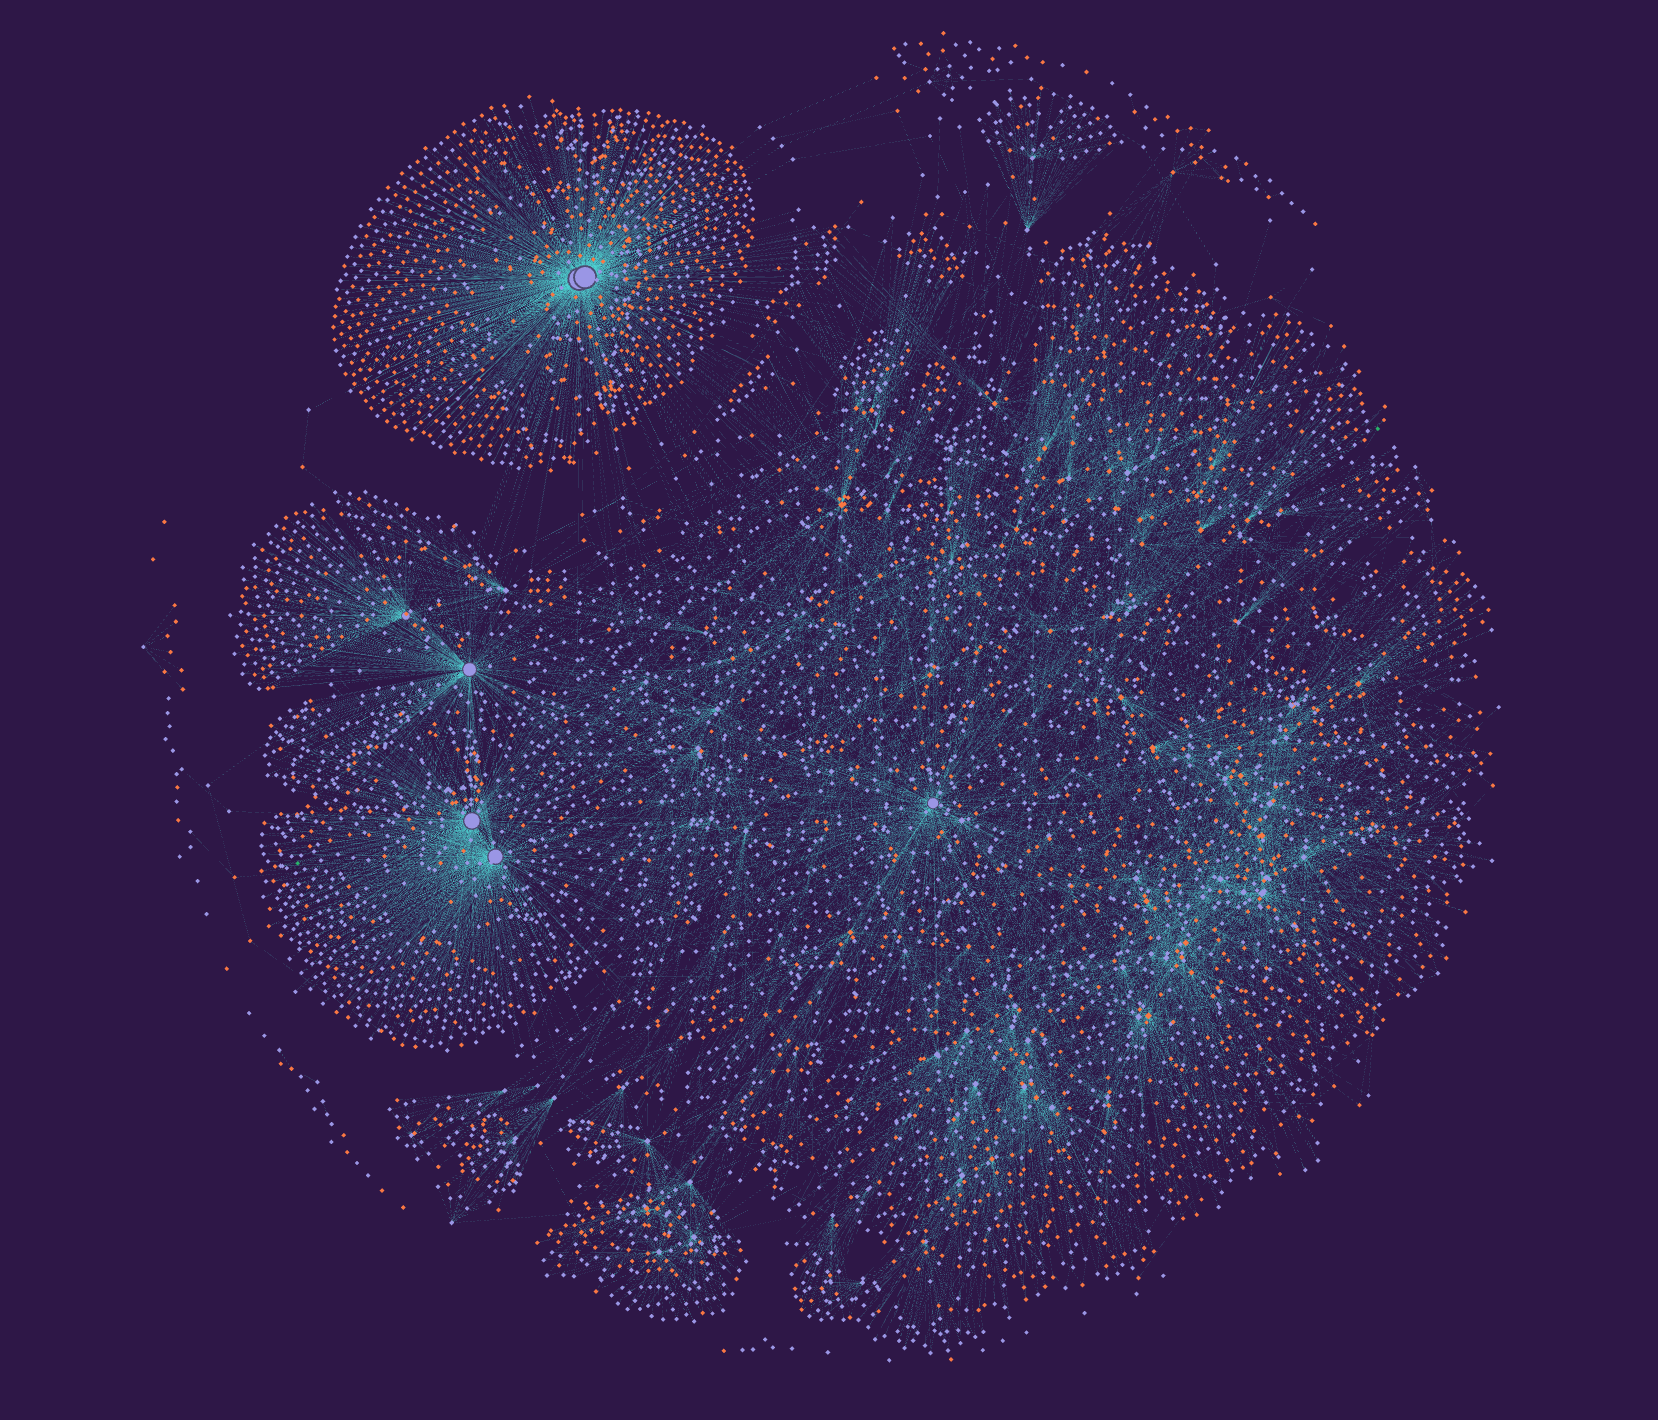

In [23]:
Image('img/img3.png')

На этой картинке две самые большие вершины соотвествуют двум участникам сообщества, которые имеют большое количество общих друзей (количество друзей у каждого около 7 тысяч).
Сам создатель сообщеста находится в середине графа.

Здесь синие вершины обозначают учатсников сообщества, а розовые - их друзей.

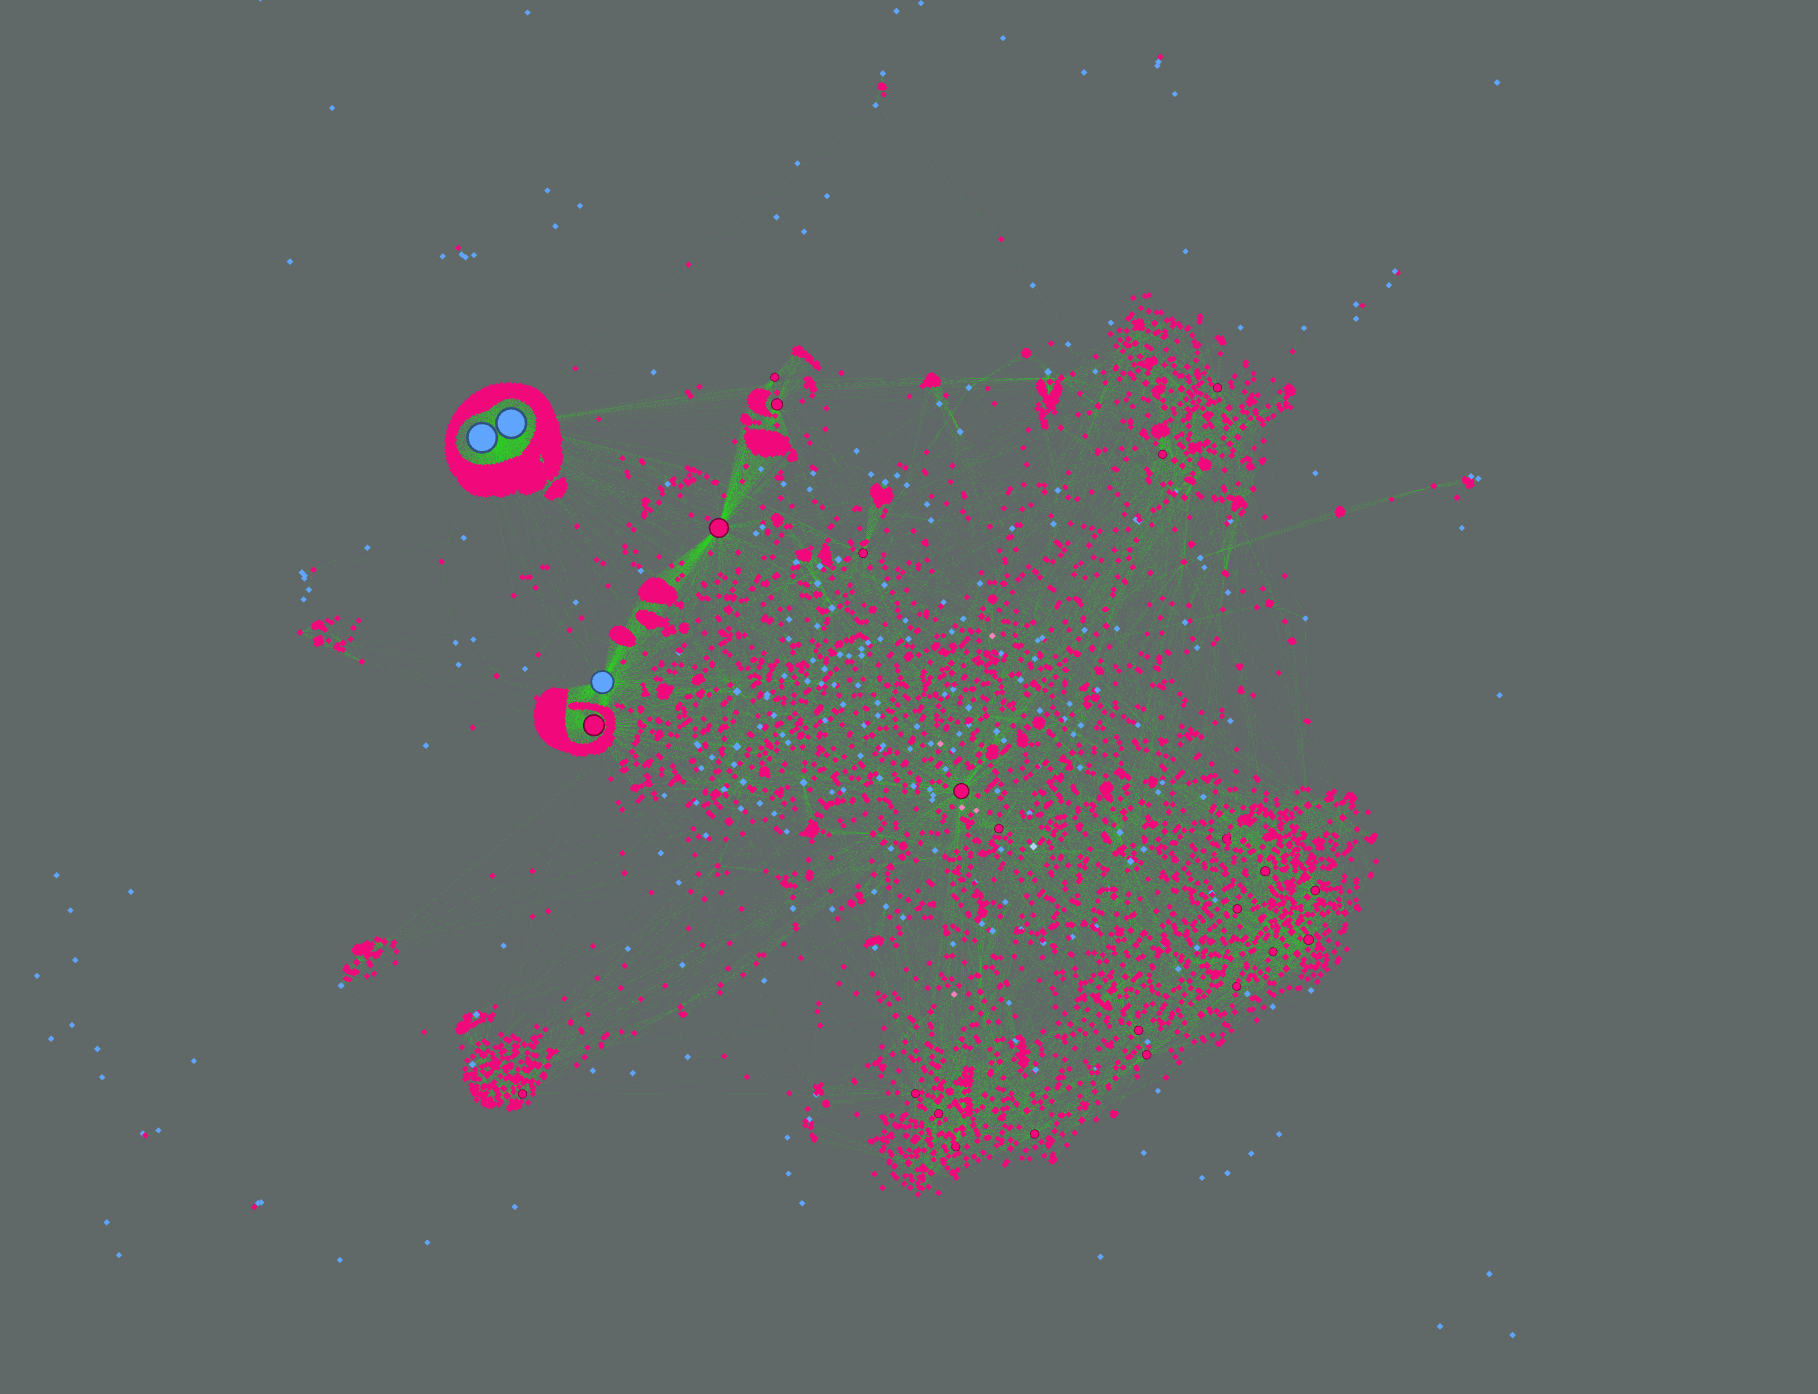

In [25]:
Image('img/img2.png')

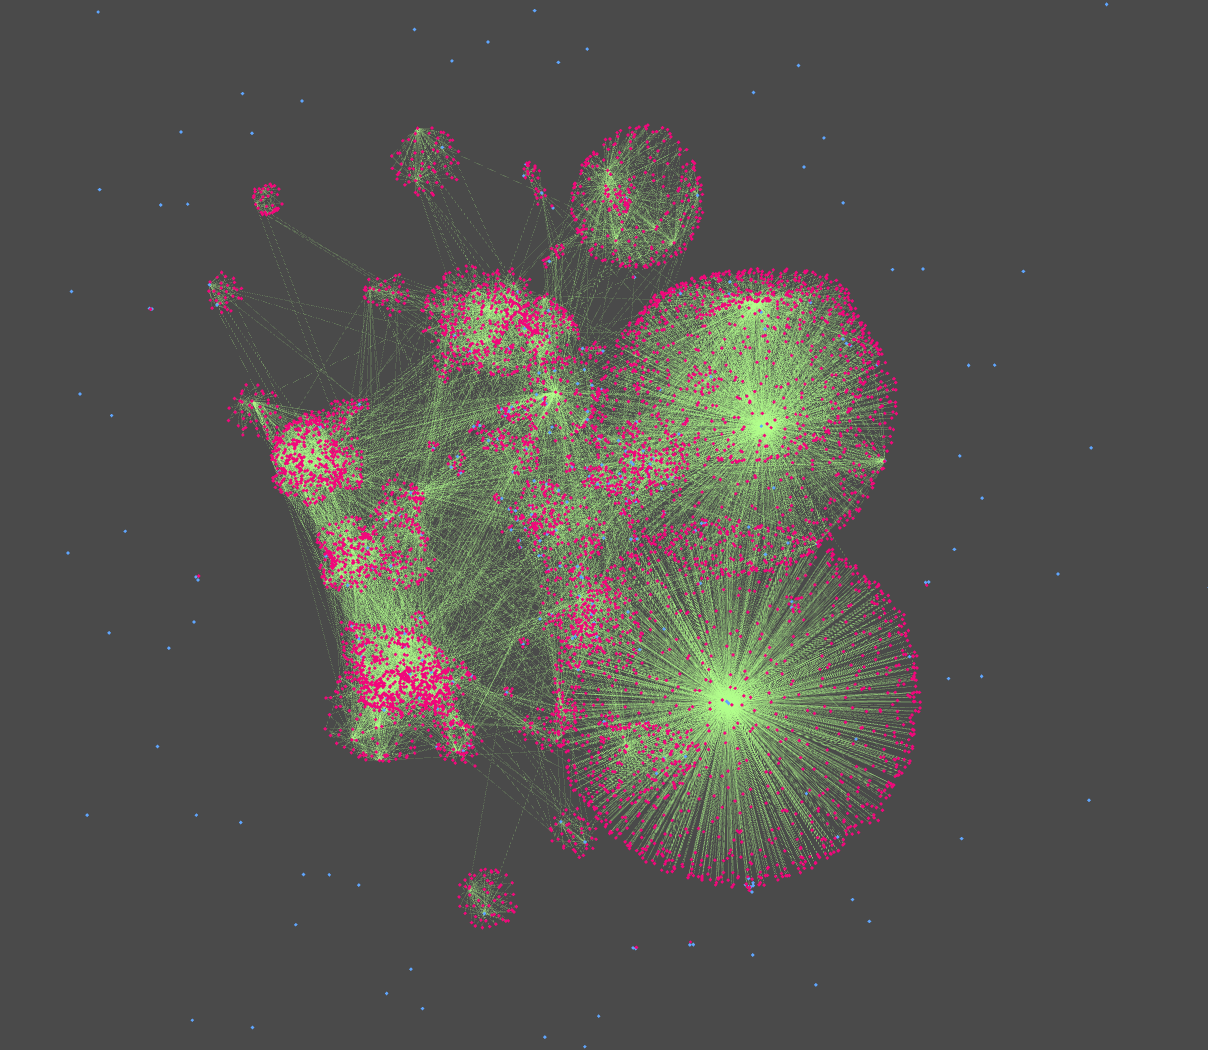

In [26]:
Image('img/img1.png')

# Центральности вершин (2 балла)

Возможно, перед тем как пойти дальше, стоит немного почитстить граф - с помощью [kcore](https://www.google.com/search?client=firefox-b-d&q=networkx+kcore)

* Найдите наиболее влиятельные вершины с точки зрения degree, closeness и betweenness centrality
* Выделите их на картинке в gephi

In [215]:
# Возьмем подграф с минимальной степенью каждой вершины равной 4 

g_core = nx.algorithms.core.k_core(g, 4)
len(g_core.nodes())

786

In [163]:
degree = dict(g_core.degree()) 

closeness = nx.centrality.closeness_centrality(g_core)  

betweenness = nx.betweenness_centrality(g_core) 

In [164]:
for n_id in g_core.nodes():
    g_core.nodes[n_id]['degree'] = degree[n_id] * 100
    g_core.nodes[n_id]['closeness'] = closeness[n_id] * 1000
    g_core.nodes[n_id]['betweenness'] = betweenness[n_id] * 1000

In [165]:
#nx.write_graphml(g_core, 'vk_graph_core.graphml')

## Betweenness centrality

Самая большая по размеру вершина соотвествует владельцу сообщества

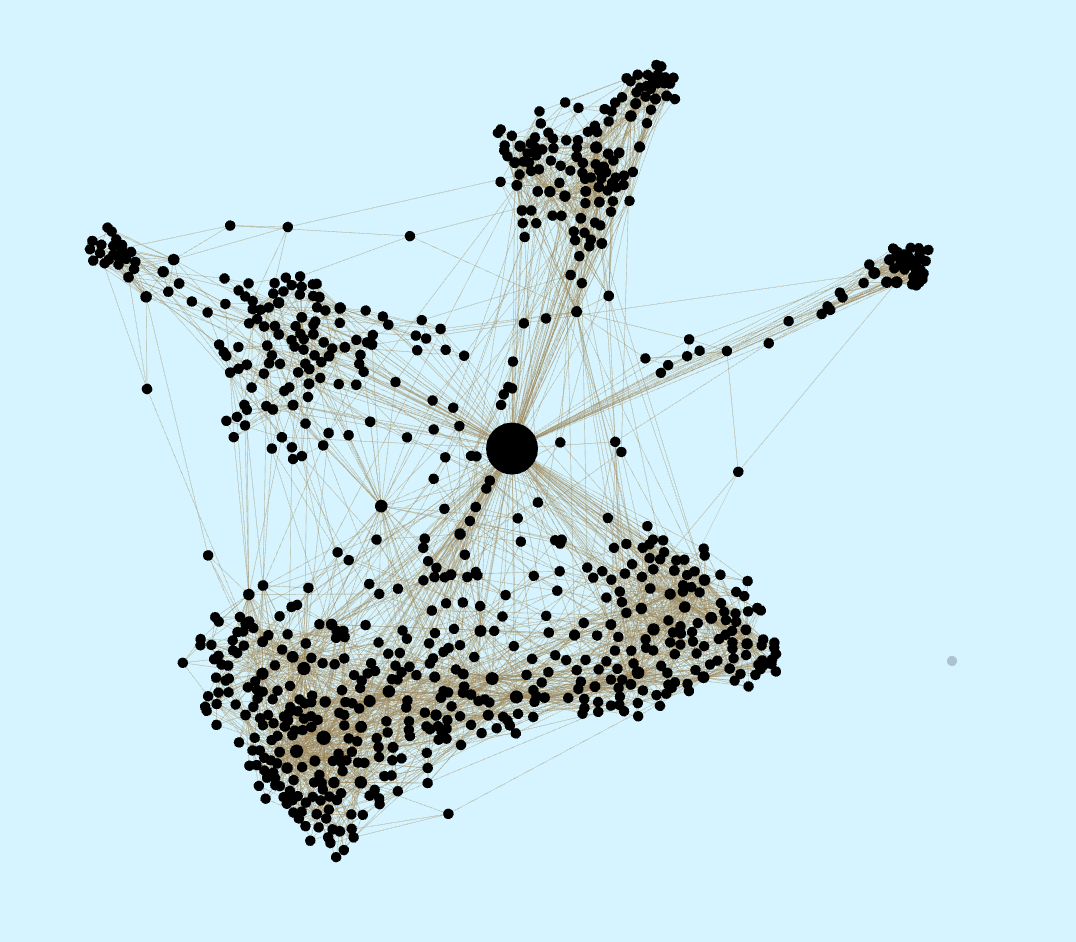

In [27]:
Image('img/betweenness.png')

## Degree centrality

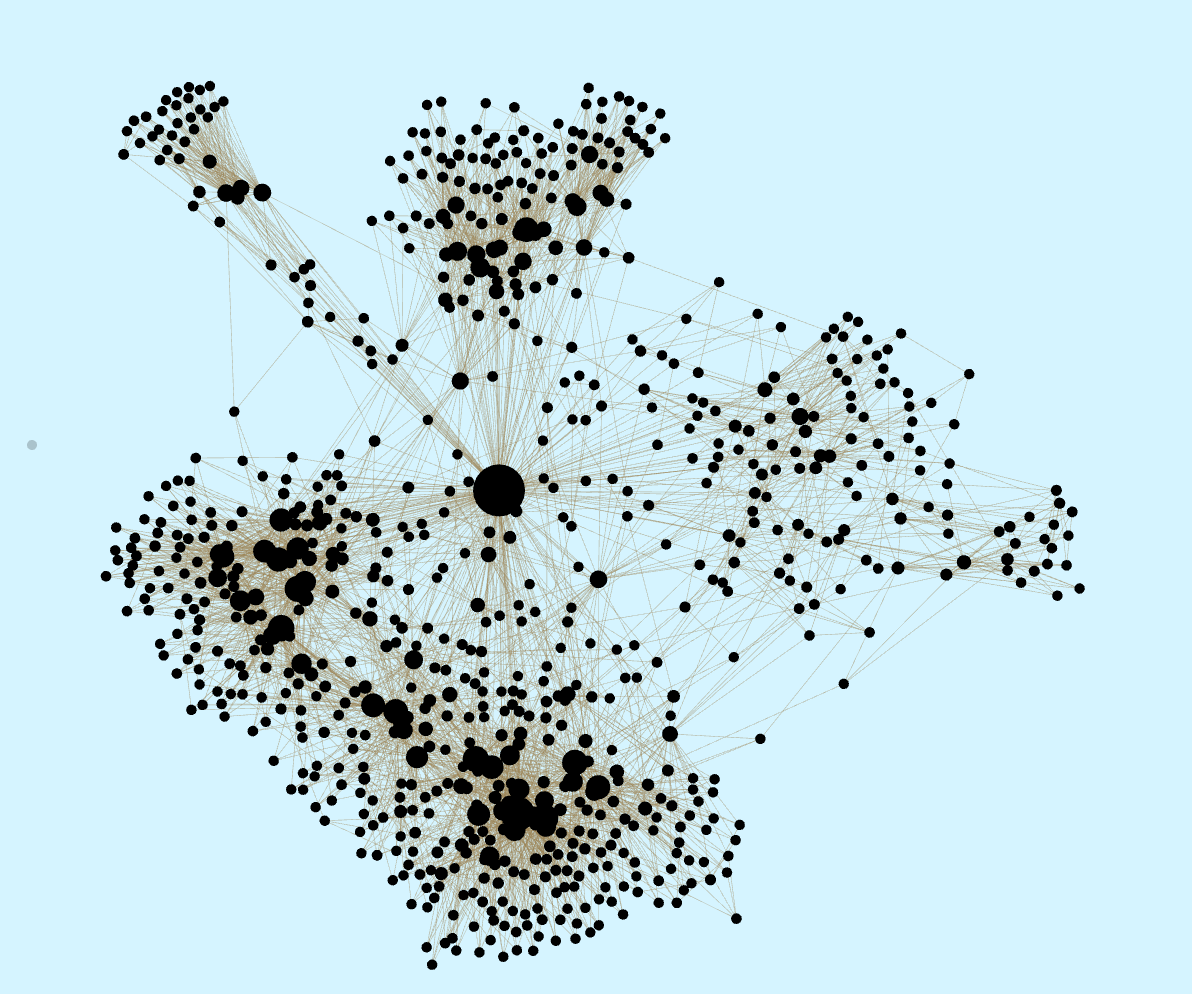

In [28]:
Image('img/degree.png')

## Closeness centrality

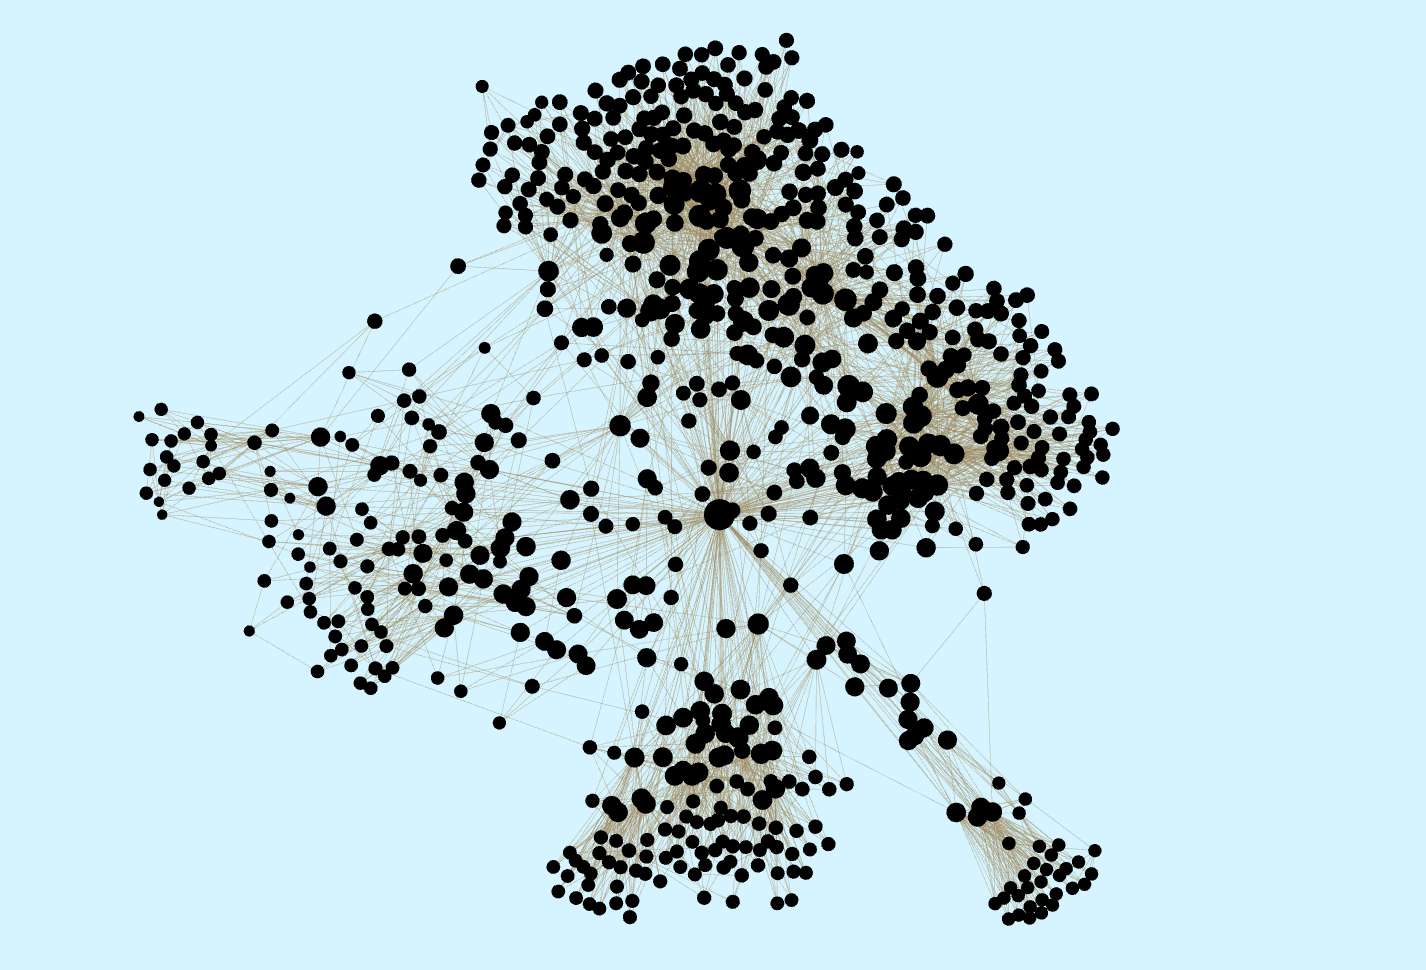

In [29]:
Image('img/closeness.png')

# Сообщества... в сообществе (2 балла)

В этом задании надо примерить 2 алгоритма выявления сообществ и сравнить их результаты

Выберите алгоритм выделения сообществ на графах, например
* label propagation или 
* алгоритм на основе edge betweeness

и алгоритм на основе похожести вершин, например 
* расчитатайте попарную похожесть по jaccard, косинусному расстоянию или корреляцию
* при необходимости переведите "похожесть" в "расстояние" (чем больше значение тем "дальше" объекты друг от друга)
* подайте матрицу попарных расстояний в алгоритм кластеризации, например в DBSCAN

Для обоих вариантов
* Выделите сообщества, опираясь на максимальное значение модулярности для полученного разбиения
* Изобразите граф с вершинами, раскрашенными в цвет своего сообщества в gephi
* Попробуйте проинтерпретировать полученные сообщества, кто эти люди, почему они связаны?
* Какой метод на ваш взгляд сработал лучше?

In [166]:
# Вычисление модулярности 

from itertools import product

def modularity(G, communities, weight='weight'):
    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm

In [192]:
# Возьмем подграф с минимальной степенью каждой вершины равной 6

g_core_сomm = nx.algorithms.core.k_core(g, 6)
len(g_core_сomm.nodes())

289

In [69]:
eb_partitions = nx.community.girvan_newman(g_core_сomm)

for partition in eb_partitions:
    num_com = len(partition)
    if num_com < 10:
        mod = modularity(g_core_сomm, partition)
        print('For {} communities modularity = {}'.format(num_com, mod))
    else:
        break

For 2 communities modularity = 0.3191043767998222
For 3 communities modularity = 0.546037982761593
For 4 communities modularity = 0.5457730745947659
For 5 communities modularity = 0.5445089208943522
For 6 communities modularity = 0.5440587509654536
For 7 communities modularity = 0.5409389975636423
For 8 communities modularity = 0.5395997948328518
For 9 communities modularity = 0.5400727031269116


In [168]:
def get_labeling_from_partition(partition):
    
    all_nodes = set()
    for cluster in partition:
        all_nodes |= cluster
    num_nodes = len(all_nodes)
    labeling = {}

    for label, ids in enumerate(partition):
        ids = list(ids)
        for i in ids:
            labeling[i] = label
        
    return labeling

### Edge betweenness

In [169]:
eb_partitions = nx.community.girvan_newman(g_core_сomm)

k = 3
for partition in eb_partitions:
    if len(partition) == k:
        break
        
eb_partition = list(partition)

In [170]:
eb_labeling = get_labeling_from_partition(eb_partition)

In [171]:
for n_id in g_core_сomm.nodes():
    g_core_сomm.nodes[n_id]['eb_partition'] = eb_labeling[n_id]

In [172]:
#nx.write_graphml(g_core_сomm, 'vk_graph_eb.graphml')

Получившиеся три сообщества можно логически проинтерпретировать так: знакомые с колледжа админа сообщества (зеленые вершины), знакомые со школы (фиолетовые вершины) и знакомые с района, где он проживает (оранжевые вершины, я тоже вошла в данное сообщество). 
    
Видно, что фиолетовые и оранжевые вершины достаточно тесно связаны между собой.
    

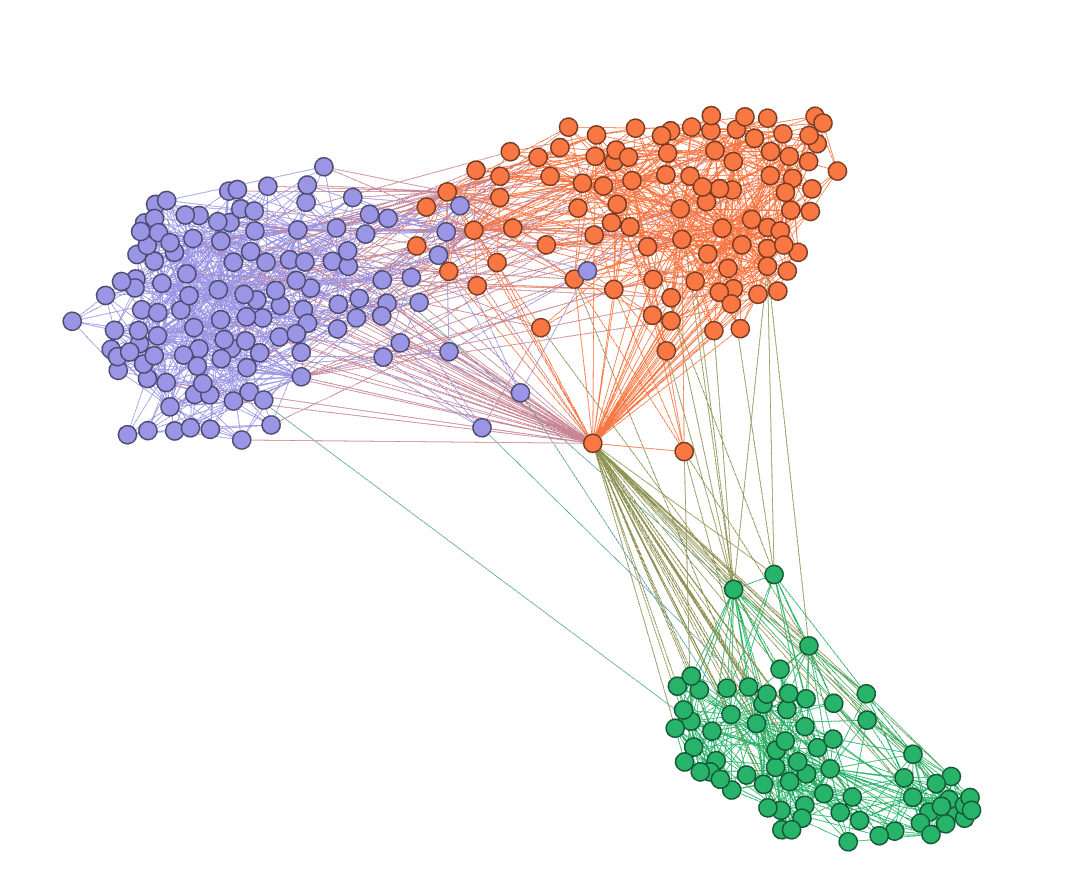

In [30]:
Image('img/eb_partition.png')

### Алгоритм на основе похожести вершин

In [193]:
g_core_сomm = nx.algorithms.core.k_core(g, 6)

len(g_core_сomm.nodes())

289

In [194]:
jac = nx.jaccard_coefficient(g_core_сomm)
jac = np.array(list(jac))

In [195]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

f = set(jac[:,1]).union(set(jac[:,0])) 
le.fit(list(f))
jac[:,1] = le.transform(jac[:,1])
jac[:,0] = le.transform(jac[:,0])

In [196]:
from scipy.sparse import coo_matrix

n = len(g_core_сomm)

D = coo_matrix((jac[:,2], (jac[:,0], jac[:,1])), shape=(n,n))

D = D+D.T

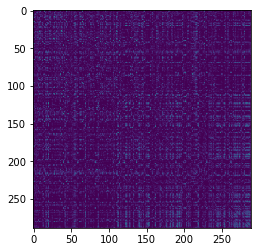

In [197]:
plt.imshow(D.toarray())

In [179]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3, affinity='precomputed')
model.fit(D)

labels = model.labels_

In [203]:
for n_id in g_core_сomm.nodes():
     g_core_сomm.nodes[n_id]['spectral'] = labels[le.transform([n_id])].tolist()[0] 

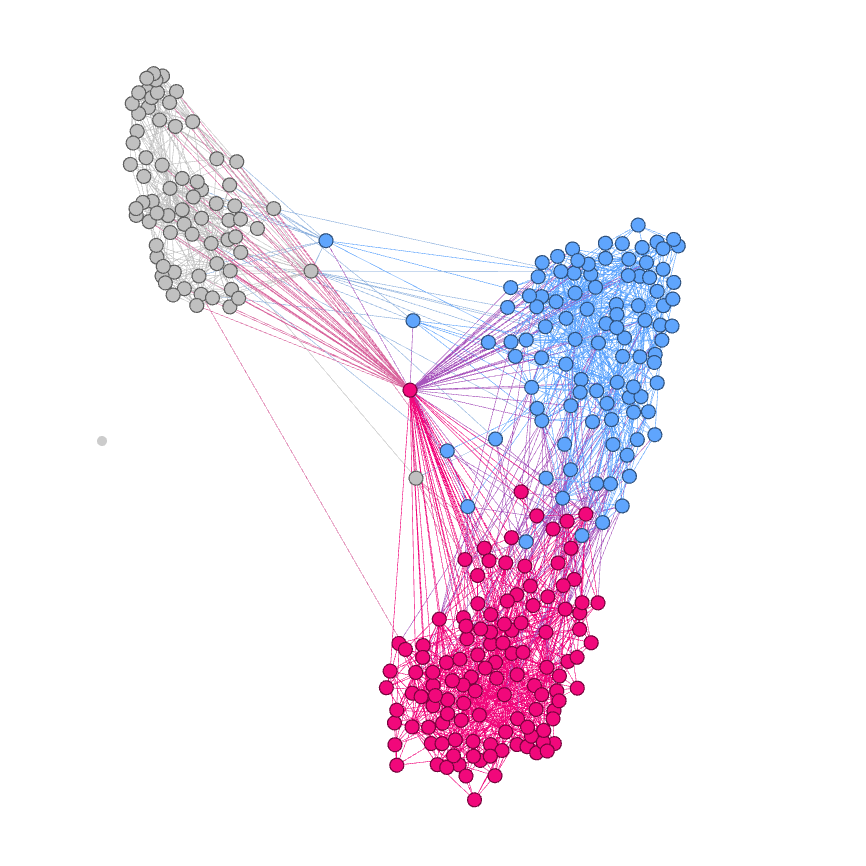

In [31]:
Image('img/spectral_clustering.png')

In [211]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="k-means++", n_clusters=3, random_state=42)
kmeans.fit(D)

labels = kmeans.labels_
labels

KMeans(n_clusters=3, random_state=42)

In [213]:
for n_id in g_core_сomm.nodes():
     g_core_сomm.nodes[n_id]['kmeans'] = labels[le.transform([n_id])].tolist()[0]

In [214]:
#nx.write_graphml(g_core_сomm, 'vk_graph_kmeans.graphml')

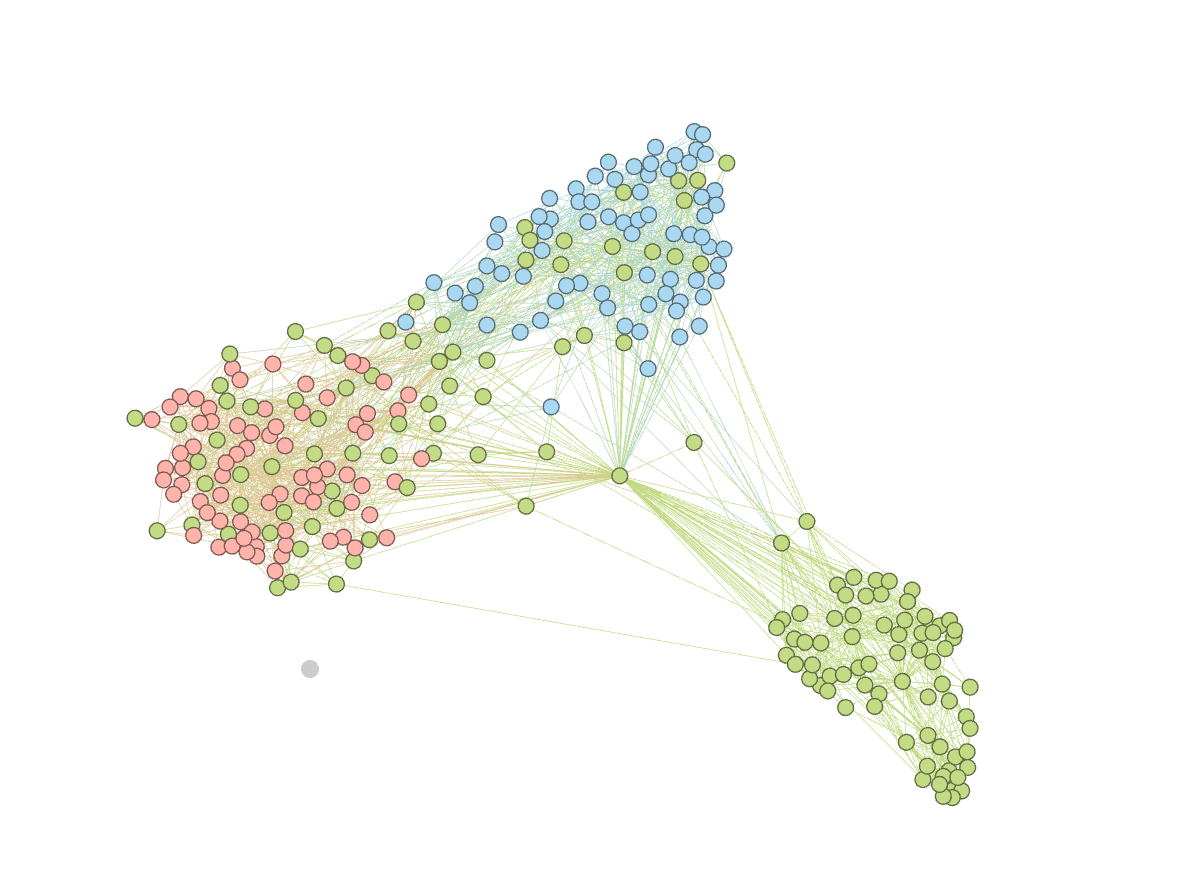

In [32]:
Image('img/kmeans.png')